In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import notebook

# The perceptron class definition

In [2]:
class Perceptron():
    
    
  def __init__(self, n_inputs, learn_rate, function, epochs):
    self.n_inputs = n_inputs
    self.learn_rate = learn_rate
    self.function = function
    self.epochs = epochs
    self.weights = None

  def fit(self, data_x, data_y):
    self.weights = np.zeros(self.n_inputs+1)
    bar = notebook.tqdm(range(self.epochs))
    for epoch in bar:
      bar.set_postfix({"Accuracy model:":str(self.accuracy(data_x, data_y))})
      for i in range(len(data_x)):
        v_predict = self.predict([data_x[i]])[0]
        if v_predict != data_y[i]:
          self.update_weights(data_x[i], data_y[i], v_predict)
  
  def accuracy(self, data_x, data_y):
    return (np.array(self.predict(data_x)) == np.array(data_y)).sum()/len(data_x)

  def add_bias(self, data_x):
    return np.hstack((np.array([[1]]*len(data_x)), data_x))

  def update_weights(self, data_x, v_expected, v_predict):
    data_x = self.add_bias([data_x])[0]
    for w in range(len(self.weights)):
      self.weights[w] = self.weights[w] + self.learn_rate*(v_expected - v_predict)*data_x[w] 

  def predict(self, data):
    predicts = []
    data = self.add_bias(data)
    for i in data:
      predicts.append(self.function((self.weights*i).sum()))
    return predicts
      



# Using the perceptron to learn AND operator

In [3]:
linear_function = lambda x: x
hard_function = lambda x: 1 if x > 0 else 0
signal_function = lambda x: 1 if x > 0 else -1
perceptron = Perceptron(2, .5, hard_function, 6)


In [4]:
perceptron.fit(np.array([[1,1],[0,1],[1,0],[0,0]]), np.array([1,0,0,0]))

In [5]:
perceptron.predict(np.array([[1,1],[1,0],[0,0]]))

[1, 0, 0]

# Methods to generate data.
 

*   Function 'generete_a' return a matrix representation the letter 'A'
*   Function 'generete_a_invert' return a matrix representation the letter 'A' inverted



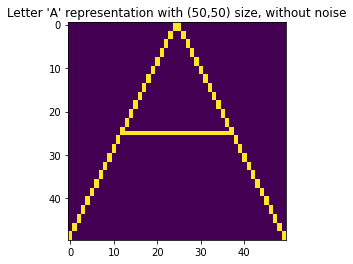

In [6]:
def generate_a(size):
  x = -np.ones((size,size))
  for i in range(size):
    x[size-1-i,i//2] = 1
    x[(size-1-i),(size-1-i//2)] = 1
  e = False
  for i in range(size):
    if x[size//2,i] > 0 and not e:
      e = True
      continue
    if e:
      if x[size//2,i] == -1:
        x[size//2,i] = 1
      else:
        return x
def generate_a_invert(size):
  x = -np.ones((size,size))
  for i in range(size):
    x[i, i//2] = 1
    x[i,(size-1-(i//2))] = 1
  e = False
  for i in range(size):
    if x[size//2,i] > 0 and not e:
      e = True
      continue
    if e:
      if x[size//2,i] == -1:
        x[size//2,i] = 1
      else:
        return x

size = 50
plt.title("Letter 'A' representation with ({size},{size}) size, without noise".format(size=size))
plt.imshow(generate_a(size))

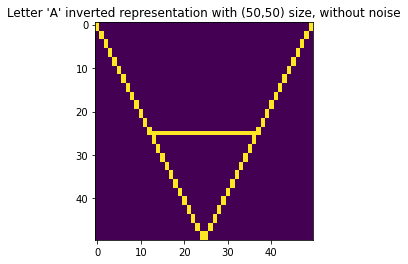

In [7]:
size = 50
plt.title("Letter 'A' inverted representation with ({size},{size}) size, without noise".format(size=size))
plt.imshow(generate_a_invert(size))

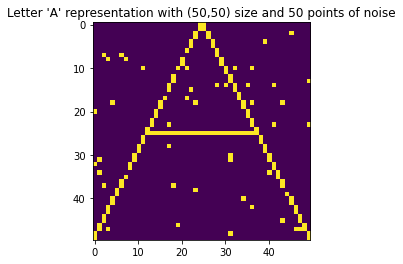

In [8]:
def introduce_noise(data, n_noise):
  noise_points = [(np.random.randint(len(data)),np.random.randint(len(data))) for n in range(n_noise)]
  for noise in noise_points:
    data[noise] = -1 if data[noise] == 1 else 1 
  return data

size = 50
n_noise = 50
plt.title("Letter 'A' representation with ({size},{size}) size and {noise} points of noise".format(size=size, noise=n_noise))
plt.imshow(introduce_noise(generate_a(size),n_noise))

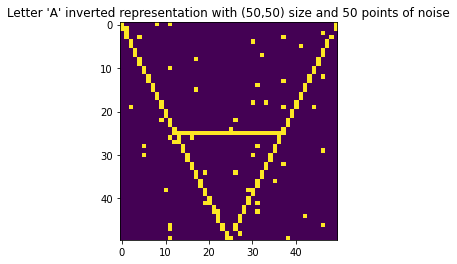

In [9]:
size = 50
n_noise = 50
plt.title("Letter 'A' inverted representation with ({size},{size}) size and {noise} points of noise".format(size=size, noise=n_noise))
plt.imshow(introduce_noise(generate_a_invert(size),(n_noise)))

# Generate dataset to train perceptron


In [10]:
size = 50
noise = 1800
n_examples = 10
data_x = []
data_y = []

for i in range(n_examples):
  d = generate_a(size)
  d = introduce_noise(d,noise)
  data_x.append(d.flatten())
  data_y.append(1)


for i in range(n_examples):
  d = generate_a_invert(size)
  d = introduce_noise(d,noise)
  data_x.append(d.flatten())
  data_y.append(-1)


In [11]:
perceptron = Perceptron(len(data_x[0]**2), .5, signal_function, 100)
perceptron.fit(data_x, data_y)

In [12]:
size = 50
noise = 1800
n_examples = 1000
data_x_test = []
data_y_test = []
imgs_x = []

for i in range(n_examples):
  d = generate_a(size)
  d = introduce_noise(d,noise)
  imgs_x.append((d, 'A'))
  data_x_test.append(d.flatten())
  data_y_test.append(1)


for i in range(n_examples):
  d = generate_a_invert(size)
  d = introduce_noise(d,noise)
  imgs_x.append((d, 'Ɐ'))
  data_x_test.append(d.flatten())
  data_y_test.append(-1)

accuracy = perceptron.accuracy(data_x_test, data_y_test)
"Accuracy of the perceptron to classify 'A' and 'Ɐ' was {}".format(accuracy)

"Accuracy of the perceptron to classify 'A' and 'Ɐ' was 0.722"

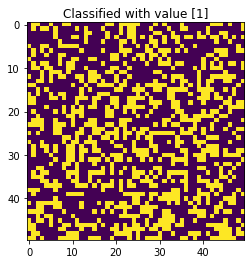

In [41]:
image_test = generate_a(size)
image_test = introduce_noise(image_test,noise)
predict_value = perceptron.predict([image_test.flatten()])
plt.title("Classified with value {}".format(predict_value))
plt.imshow(image_test)

In [44]:
a = perceptron.predict(data_x_test)

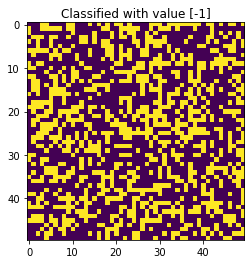

In [14]:
image_test = generate_a_invert(size)
image_test = introduce_noise(image_test,noise)
predict_value = perceptron.predict([image_test.flatten()])
plt.title("Classified with value {}".format(predict_value))
plt.imshow(image_test)

In [15]:
def print_examples(array, cols=5):
  rows = (len(array) // cols)
  fig, axs = plt.subplots(rows,cols)
  fig.suptitle('A')

  fig.set_figheight(20)
  fig.set_figwidth(20)

  row = 0
  col = 0 

  for img in range(0, len(array)):
    
    axs[row, col].imshow(array[img][0])
    axs[row, col].title.set_text(array[img][1])
    col += 1

    if (col % cols) == 0:
      col = 0
      row += 1


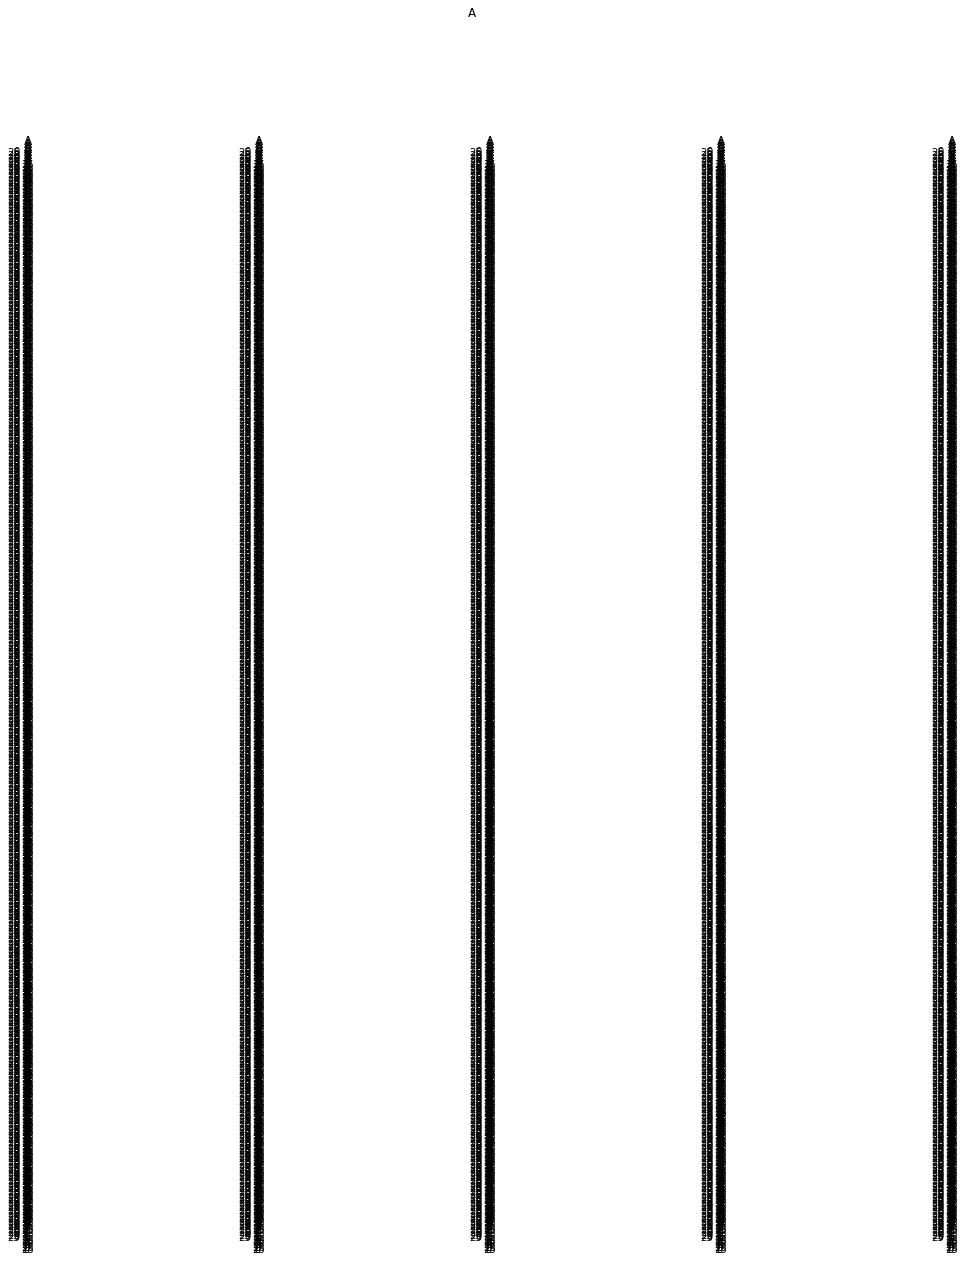

In [16]:
print_examples(imgs_x)

  

In [20]:
len(data_x_test)

2000

In [34]:
predicted_values = []

for index in range(0, len(data_x_test)):
    predict_value = perceptron.predict(data_x_test[index])
    predicted_values.append(predict_value)

#predict_value = perceptron.predict([image_test.flatten()])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [24]:
data_y_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [27]:
len(predicted_values)

2000

In [59]:
def table_experiment(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    N = len(y_actual)
    
    total_a = sum()

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==-1:
           TN += 1
        if y_hat[i]==-1 and y_actual[i]!=y_hat[i]:
           FN += 1

    print("True Positive: {:.2f} False Positive: {:.2f}".format(TP/N, FP/N))
    print("True Negative: {:.2f} False Negative: {:.2f}".format(TN/N, FN/N))
    return(TP, FP, TN, FN)

predicted_values = perceptron.predict(data_x_test)
len(data_x_test)

table_experiment(data_y_test, predicted_values)

True Positive: 0.46 False Positive: 0.24
True Negative: 0.26 False Negative: 0.04


(921, 477, 523, 79)

In [57]:
len(predicted_values)

2000

In [50]:
data_y_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [58]:
int(-1)

-1

In [40]:
len(data_x_test[0])

2500